In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import multivariate_normal
import joblib


from gaussian_search import GaussianProcessSearch

%load_ext autoreload
%autoreload 2

# 1. Define the example model

The logarithm of the model, typically assumed to be expensive to evaluate, which we would like to explore:

<IPython.core.display.Javascript object>


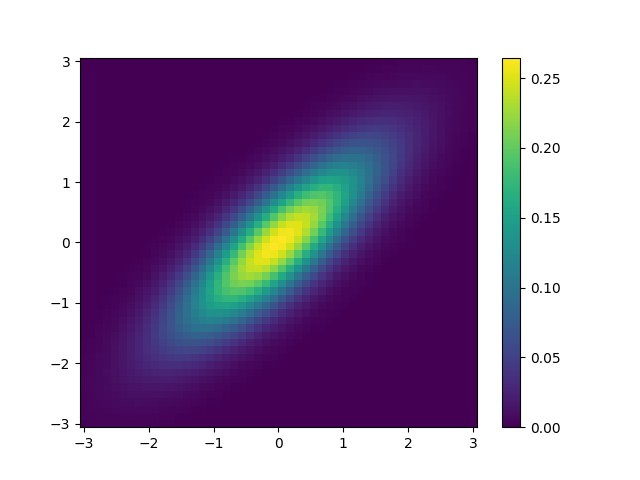

In [2]:
def model(x, y):
    return multivariate_normal.logpdf([x, y], mean=[0, 0], cov=[[1.0, 0.8], [0.8, 1.0]])

# Visualise the model
X, Y = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
plot_points = np.vstack([X.reshape(-1,), Y.reshape(-1,)]).T
Z = np.array([model(plot_points[i, 0], plot_points[i, 1]) for i in range(plot_points.shape[0])]).reshape(X.shape)

plt.figure()
plt.pcolormesh(X, Y, np.exp(Z), shading='auto')
plt.colorbar()
plt.show()

Prior boundaries and boundaries:

# 2. Define the grid search and sample two batches

In [3]:
bounds = {'x': (-3, 3),
          'y': (-3, 3)}

params = ['x', 'y']

grid = GaussianProcessSearch('test_model', params, model, bounds, random_state=42)

batch_size = 10
grid.run_batches(Ninit=2, batch_size=batch_size)

2021-04-22 15:00:14.636964: evaluating 10 samples.
2021-04-22 15:00:14.641540: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
2021-04-22 15:00:14.680354: evaluating 10 samples.
2021-04-22 15:00:14.684492: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
Terminating, number of requested iterations reached.
2021-04-22 15:00:14.719954: sampling the surrogate model.


1587it [00:06, 236.41it/s, +500 | bound: 0 | nc: 1 | ncall: 11361 | eff(%): 18.370 | loglstar:   -inf < -1.260 <    inf | logz: -3.589 +/-  0.073 | dlogz:  0.001 >  0.509]

Output saved at ./out/test_model/.


## Visualise the current acquisition function

<IPython.core.display.Javascript object>


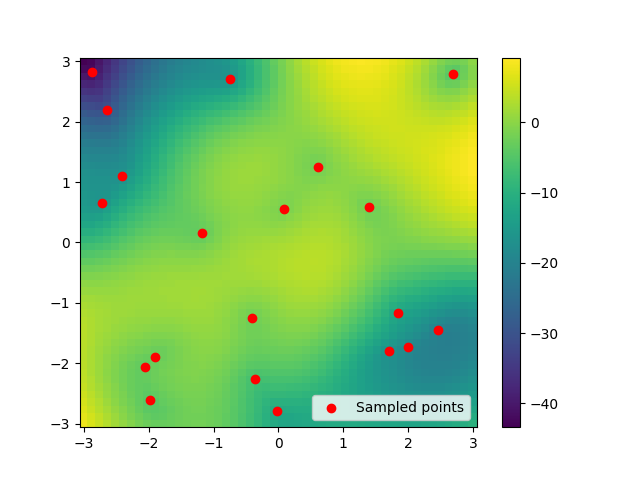

In [4]:
Z_acq = grid.surrogate_predict(plot_points, kappa=grid.kappa).reshape(X.shape)

plt.figure()
plt.pcolormesh(X, Y, Z_acq, shading='auto')
plt.colorbar()
plt.scatter(grid.positions['x'], grid.positions['y'], c='red', label='Sampled points')
plt.legend()
plt.show()

## Visualise the current surrogate model

<IPython.core.display.Javascript object>


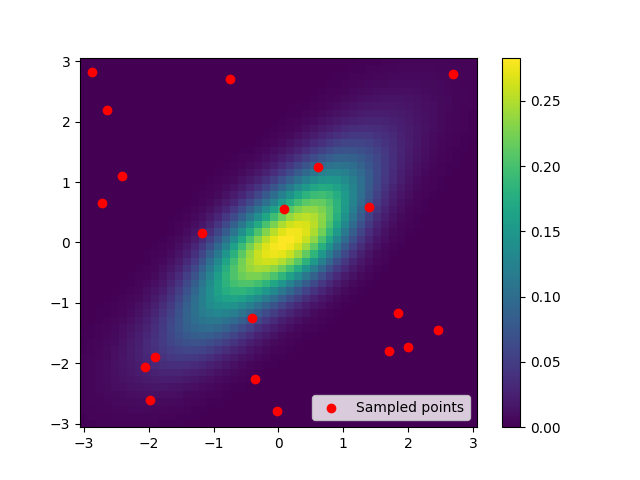

In [5]:
Z_surrogate = grid.surrogate_predict(plot_points).reshape(X.shape)

plt.figure()
plt.pcolormesh(X, Y, np.exp(Z_surrogate), shading='auto')
plt.colorbar()
plt.scatter(grid.positions['x'], grid.positions['y'], c='red', label='Sampled points')
plt.legend()
plt.show()

# 3. Sample the acquisition function a few times

In [6]:
grid.run_batches(Nmcmc=5, batch_size=20)

2021-04-22 15:00:22.330201: sampling the acquisition function.


2843it [00:20, 139.71it/s, +500 | bound: 12 | nc: 1 | ncall: 27787 | eff(%): 12.031 | loglstar:   -inf <  9.228 <    inf | logz:  4.276 +/-  0.139 | dlogz:  0.001 >  0.509]


2021-04-22 15:00:42.937926: evaluating 20 samples.
2021-04-22 15:00:42.943800: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
2021-04-22 15:00:43.007019: sampling the acquisition function.


2173it [00:10, 208.19it/s, +500 | bound: 2 | nc: 1 | ncall: 18824 | eff(%): 14.200 | loglstar:   -inf <  1.897 <    inf | logz: -1.823 +/-  0.112 | dlogz:  0.001 >  0.509]


2021-04-22 15:00:53.679123: evaluating 20 samples.
2021-04-22 15:00:53.685060: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
2021-04-22 15:00:53.737559: sampling the acquisition function.


1509it [00:05, 282.23it/s, +500 | bound: 0 | nc: 1 | ncall: 10293 | eff(%): 19.518 | loglstar:   -inf < -1.077 <    inf | logz: -3.259 +/-  0.067 | dlogz:  0.001 >  0.509]


2021-04-22 15:00:59.354501: evaluating 20 samples.
2021-04-22 15:00:59.359949: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
2021-04-22 15:00:59.411114: sampling the acquisition function.


1546it [00:05, 258.39it/s, +500 | bound: 0 | nc: 1 | ncall: 10274 | eff(%): 19.914 | loglstar:   -inf < -1.220 <    inf | logz: -3.483 +/-  0.072 | dlogz:  0.001 >  0.509]


2021-04-22 15:01:05.645050: evaluating 20 samples.
2021-04-22 15:01:05.657089: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
2021-04-22 15:01:05.722766: sampling the acquisition function.


1553it [00:05, 262.75it/s, +500 | bound: 0 | nc: 1 | ncall: 11154 | eff(%): 18.406 | loglstar:   -inf < -1.251 <    inf | logz: -3.528 +/-  0.073 | dlogz:  0.001 >  0.509]


2021-04-22 15:01:11.885958: evaluating 20 samples.
2021-04-22 15:01:11.891802: refitting the Gaussian process.
Checkpoint saved at ./temp/checkpoint_test_model.z
Terminating, number of requested iterations reached.
2021-04-22 15:01:11.950246: sampling the surrogate model.


1524it [00:05, 280.17it/s, +500 | bound: 0 | nc: 1 | ncall: 11240 | eff(%): 18.007 | loglstar:   -inf < -1.328 <    inf | logz: -3.528 +/-  0.067 | dlogz:  0.001 >  0.509]

Output saved at ./out/test_model/.


## Visualise the results

In [7]:
# Load the surrogate samples results
samples = np.load('./out/test_model/surrogate_samples.npy')

with open('./out/test_model/logz.txt', 'r') as f:
    logz = float(f.read())

In [8]:
Xsamples = np.vstack([samples[p] for p in grid.params]).T

print('Mean:')
print(np.mean(Xsamples, axis=0))
print('Covariance:')
print(np.cov(Xsamples, rowvar=False))
print('Evidence:')
print(np.exp(logz))

Mean:
[0.01400488 0.00666634]
Covariance:
[[0.91059775 0.71216976]
 [0.71216976 0.89520831]]
Evidence:
1.0569975865319745


So not so bad for only $120$ point sampled from the expensive posterior:

<IPython.core.display.Javascript object>


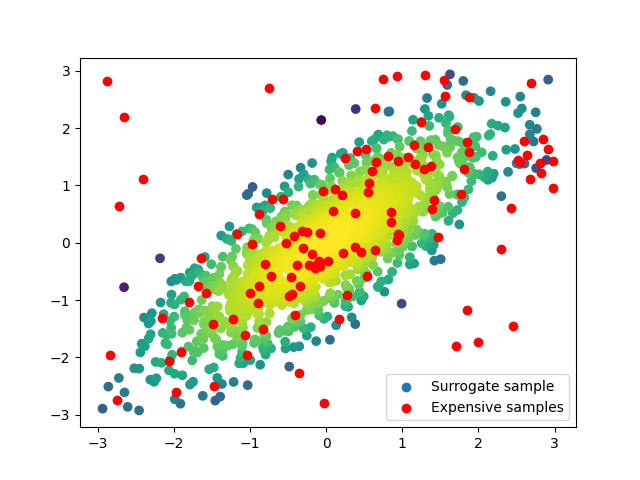

In [9]:
plt.figure()
plt.scatter(samples['x'], samples['y'], c=samples['target'], label='Surrogate sample')
plt.scatter(grid.positions['x'], grid.positions['y'], c='red', label='Expensive samples')
plt.legend()
plt.show()